# The Sparks Foundation - Data Science Intern GRIPJAN21 TSF

## Task #2 - Prediction Using Unsupervised ML

### From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

## Author: Manjiri H Sawant

### Clustering With K-Means

Clustering is often reffered to as Unsupervised Machine Learning technique.

Clustering is the process of dividing the datasets into groups, consisting of similar data points.

Import necessary libraries

The following code written in python 3.x. Libraries provide pre-written functionally to perform necessary tasks

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
data = pd.read_csv('C:/Users/Public/Downloads/Iris.csv')

In [3]:
#print number of rows and number of columns of data
data.shape

(150, 6)

In [4]:
#print top 5 rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#checking missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#Removing 'Id' and 'Species' columns
data.drop(['Id','Species'], axis = 1, inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Kmeans is centroid based algorithm

#### How to determine the correct number of clusters(K)?

#### Elbow Method

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [8]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [9]:
SSE = []

In [10]:
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Sum of Squared Errors')

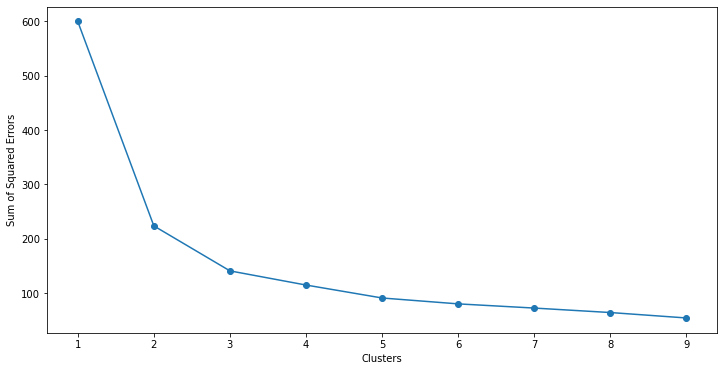

In [11]:
plt.figure(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})
plt.plot(frame['Cluster'],frame['SSE'], marker = 'o')
plt.xlabel('Clusters')
plt.ylabel('Sum of Squared Errors')

### The optimum number of cluster is 3

In [12]:
data_s = data[['SepalLengthCm','SepalWidthCm']]
data_s.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [13]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3)
yp = kmeans.fit_predict(data_s)
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [14]:
pd.Series(yp).value_counts()

2    53
1    50
0    47
dtype: int64

In [15]:
kmeans.inertia_

37.1237021276596

In [16]:
kmeans.score(data_s)

-37.1237021276596

In [17]:
data_s['cluster'] = yp
data_s.head()

,SepalLengthCm,SepalWidthCm,cluster
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


In [18]:
data_s.cluster.unique()

array([1, 0, 2])

In [19]:
kmeans.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.006     , 3.418     ],
       [5.77358491, 2.69245283]])

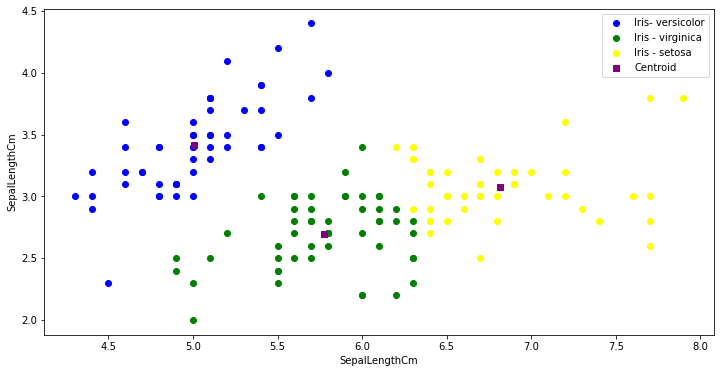

In [20]:
plt.figure(figsize = (12,6))

data1 = data_s[data_s.cluster==1]
data2 = data_s[data_s.cluster==2]
data3 = data_s[data_s.cluster==0]

plt.scatter(data1['SepalLengthCm'], data1['SepalWidthCm'], color = 'blue', label = 'Iris- versicolor' )
plt.scatter(data2['SepalLengthCm'], data2['SepalWidthCm'], color = 'green', label = 'Iris - virginica')
plt.scatter(data3['SepalLengthCm'], data3['SepalWidthCm'], color = 'yellow',label = 'Iris - setosa')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'purple', marker = 's', label = 'Centroid')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalLengthCm')
plt.legend()